## Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading datasets

In [2]:
games = pd.read_csv('games.csv', encoding='utf-8')
games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,2195250,EA SPORTS FC™ 24,2023-09-28,True,False,False,Mixed,55,4473,70.00,0.00,0.0,True
50792,2362300,Train Sim World® 4,2023-09-26,True,False,False,Mixed,65,351,50.00,0.00,0.0,True
50793,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50794,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True


In [3]:
recommend = pd.read_csv('recommendations.csv', encoding='utf-8')
recommend

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,49618,0
1,304390,4,0,2017-02-17,False,11.5,2482,1
2,1085660,2,0,2019-11-17,True,336.5,243365,2
3,703080,0,0,2022-09-23,True,27.4,248653,3
4,526870,0,0,2021-01-10,True,7.9,22898,4
...,...,...,...,...,...,...,...,...
38347609,447290,0,0,2019-07-26,True,16.0,13301938,38347609
38347610,421040,0,0,2021-01-05,True,18.4,1987020,38347610
38347611,389510,47,34,2018-05-25,True,4.7,1729558,38347611
38347612,421040,0,0,2019-12-08,True,6.3,6706947,38347612


In [4]:
users = pd.read_csv('users.csv', encoding='utf-8')
users

,user_id,products,reviews
0,7089523,359,0
1,13509147,156,1
2,8443010,329,4
3,4631165,176,3
4,4967668,98,2
...,...,...,...
13784080,4851198,6,0
13784081,4851894,0,0
13784082,4862604,31,0
13784083,4877321,0,0


## Data preprocessing

In [5]:
# number of unique values in 'app_id' column
len(pd.unique(games['app_id']))

50796

The number of unique values in 'app_id' column equal the number of rows in games dataset which represent there is no duplicate value in games dataset

In [6]:
# number of unique values in 'app_id' column in users dataset
len(pd.unique(users['user_id']))

13784085

there is no duplicate value in users dataset

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50796 non-null  int64  
 1   title           50796 non-null  object 
 2   date_release    50796 non-null  object 
 3   win             50796 non-null  bool   
 4   mac             50796 non-null  bool   
 5   linux           50796 non-null  bool   
 6   rating          50796 non-null  object 
 7   positive_ratio  50796 non-null  int64  
 8   user_reviews    50796 non-null  int64  
 9   price_final     50796 non-null  float64
 10  price_original  50796 non-null  float64
 11  discount        50796 non-null  float64
 12  steam_deck      50796 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [8]:
# convert date_release to datetime data type
games['date_release'] = pd.to_datetime(games['date_release'])

In [9]:
# date_release in years
games['date_release'].dt.year.value_counts()

2022    7265
2021    6774
2020    6135
2018    5461
2019    5057
2017    4989
2016    4209
2023    3349
2015    2963
2014    1921
2013     822
2012     565
2011     376
2009     322
2010     284
2008     146
2007      82
2006      56
2004       4
2005       3
1999       3
2001       2
1997       2
2000       2
2003       2
2002       1
1998       1
Name: date_release, dtype: int64

In [10]:
recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38347614 entries, 0 to 38347613
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.0+ GB


In [11]:
# convert date to datetime data type
recommend['date'] = pd.to_datetime(recommend['date'])

In [12]:
# date in years
recommend['date'].dt.year.value_counts()

2022    9014061
2021    8277472
2020    7025031
2019    3912726
2018    2618489
2017    2603085
2016    2039954
2015    1342856
2014    1042752
2013     306276
2012      91493
2011      62953
2010      10466
Name: date, dtype: int64

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13784085 entries, 0 to 13784084
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 315.5 MB


## Data visualization

### The number of Games released by Year

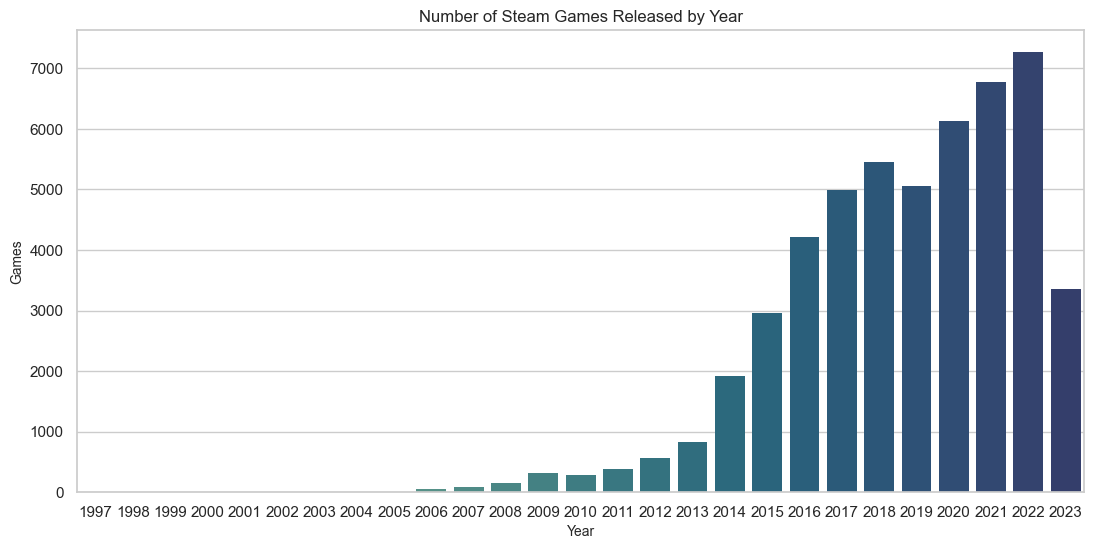

In [14]:
years = games['date_release'].dt.year.value_counts()

sns.set(style="whitegrid", color_codes=True)
sns.set_context(rc = {'patch.linewidth': 0.0})
palet = sns.color_palette("crest", len(years.values))
plt.figure(figsize=(13, 6))

ax = sns.barplot(x=years.index, y=years.values, palette=palet)
plt.ylabel('Games', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.title('Number of Steam Games Released by Year')

plt.show()


### Price distribution

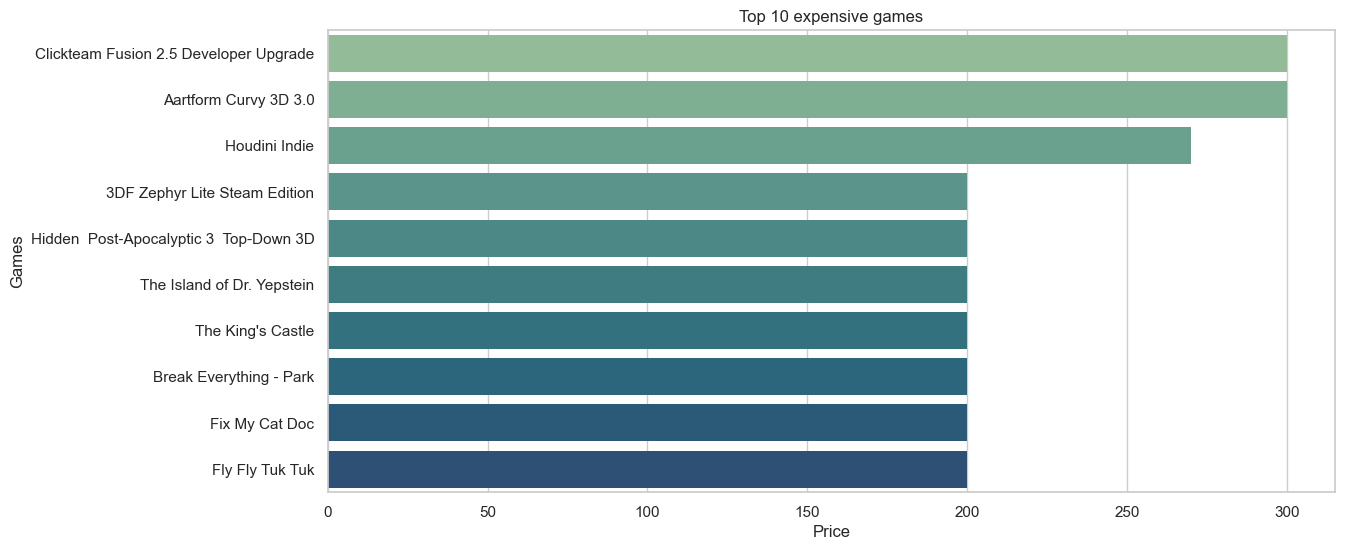

In [15]:
# Top 10 expensive game
top_expensive_games = games.groupby('title').agg({'price_final':'sum'}).reset_index().sort_values('price_final',ascending=False).head(10)

palet = sns.color_palette("crest", len('price_final'))
plt.figure(figsize=(13, 6))

sns.barplot(top_expensive_games, x='price_final', y='title', palette=palet)
plt.ylabel('Games')
plt.xlabel('Price')
plt.title('Top 10 expensive games')

plt.show()

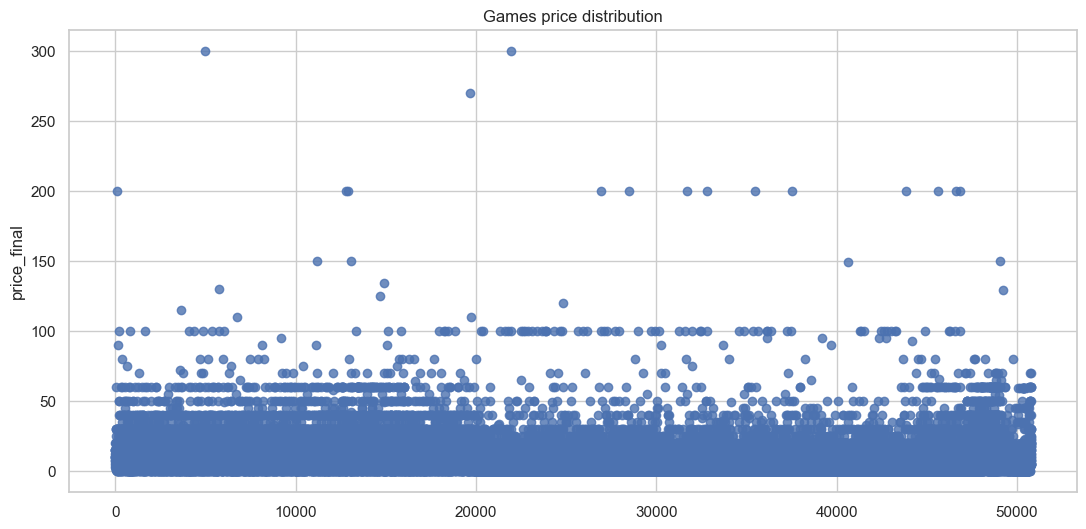

In [16]:
# Games Price_final distribution

plt.figure(figsize=(13, 6))
sns.regplot(games, x = games.index, y = 'price_final')

plt.title('Games price distribution')
plt.show()

In [17]:
games['discount'].unique()

array([ 0., 70., 88., 85., 60., 50., 40., 90., 86., 87., 65., 75., 20.,
       56., 25., 80., 34., 63., 10., 30., 71., 15., 66., 35., 67., 72.,
       83., 39., 24., 48., 33., 21., 55., 22., 45., 81., 74., 51., 69.,
       68., 23., 62., 14., 47., 17., 53., 44., 12., 27., 77., 79., 41.,
       73., 58., 89., 28., 32., 54., 76., 46., 36., 82., 52., 78., 49.,
       42., 61., 43., 37., 84., 16., 26., 59., 29.,  9.])

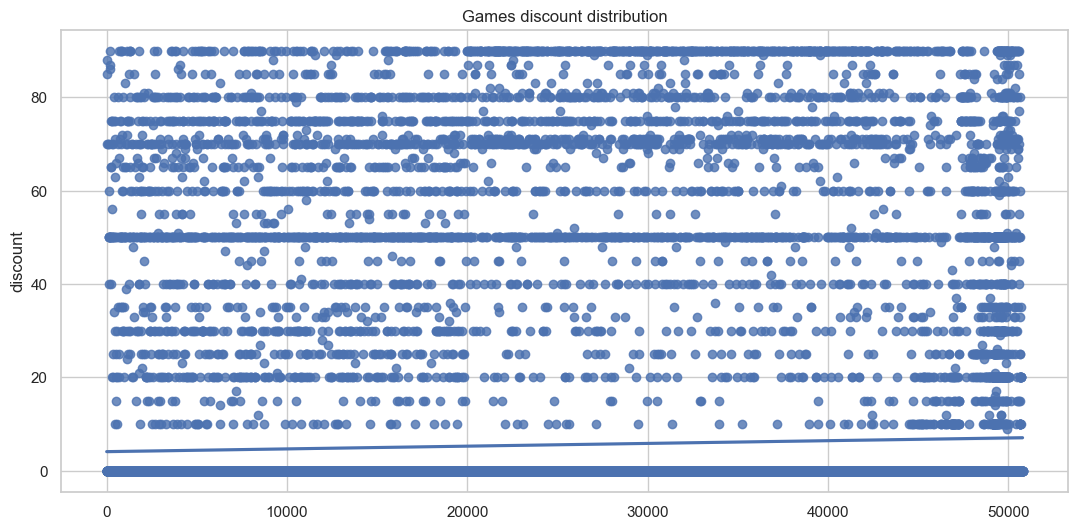

In [18]:
# Games discount distribution

plt.figure(figsize=(13, 6))
sns.regplot(games, x = games.index, y = 'discount')

plt.title('Games discount distribution')
plt.show()

## Operational Systems

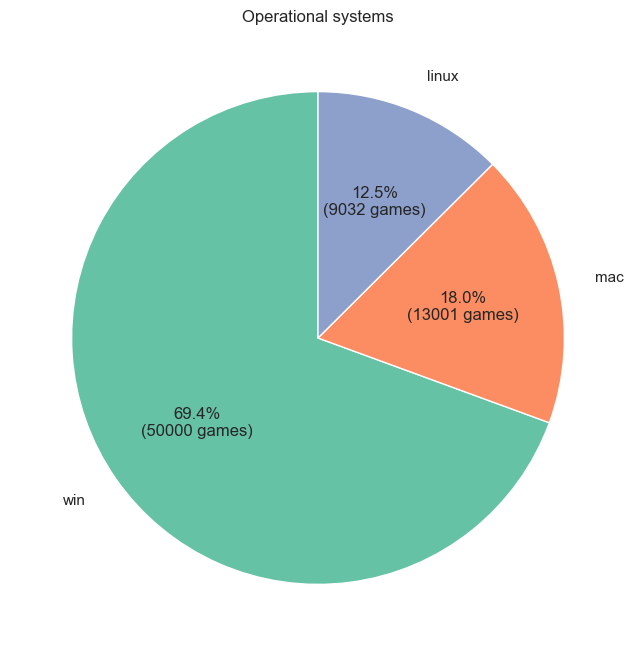

In [19]:
sys = games[['win', 'mac', 'linux']].sum()

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} games)".format(pct, absolute)

# Creating pie chart
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Operational systems')
ax.pie(sys, labels=sys.index, 
       autopct = lambda pct: func(pct, sys), startangle=90, 
       colors=sns.color_palette('Set2'), labeldistance=1.15, 
       wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })

plt.show()


## Rating distribution

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50796 non-null  int64         
 1   title           50796 non-null  object        
 2   date_release    50796 non-null  datetime64[ns]
 3   win             50796 non-null  bool          
 4   mac             50796 non-null  bool          
 5   linux           50796 non-null  bool          
 6   rating          50796 non-null  object        
 7   positive_ratio  50796 non-null  int64         
 8   user_reviews    50796 non-null  int64         
 9   price_final     50796 non-null  float64       
 10  price_original  50796 non-null  float64       
 11  discount        50796 non-null  float64       
 12  steam_deck      50796 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 3.7+ MB


In [21]:
games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.079600e+04,50796.000000,5.079600e+04,50796.000000,50796.000000,50796.000000
mean,1.053900e+06,77.051205,1.826493e+03,8.600661,8.739845,5.600579
std,6.094493e+05,18.255492,4.010343e+04,11.496417,11.510670,18.619336
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.282450e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.850750e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.523155e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.576800e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


In [22]:
games['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

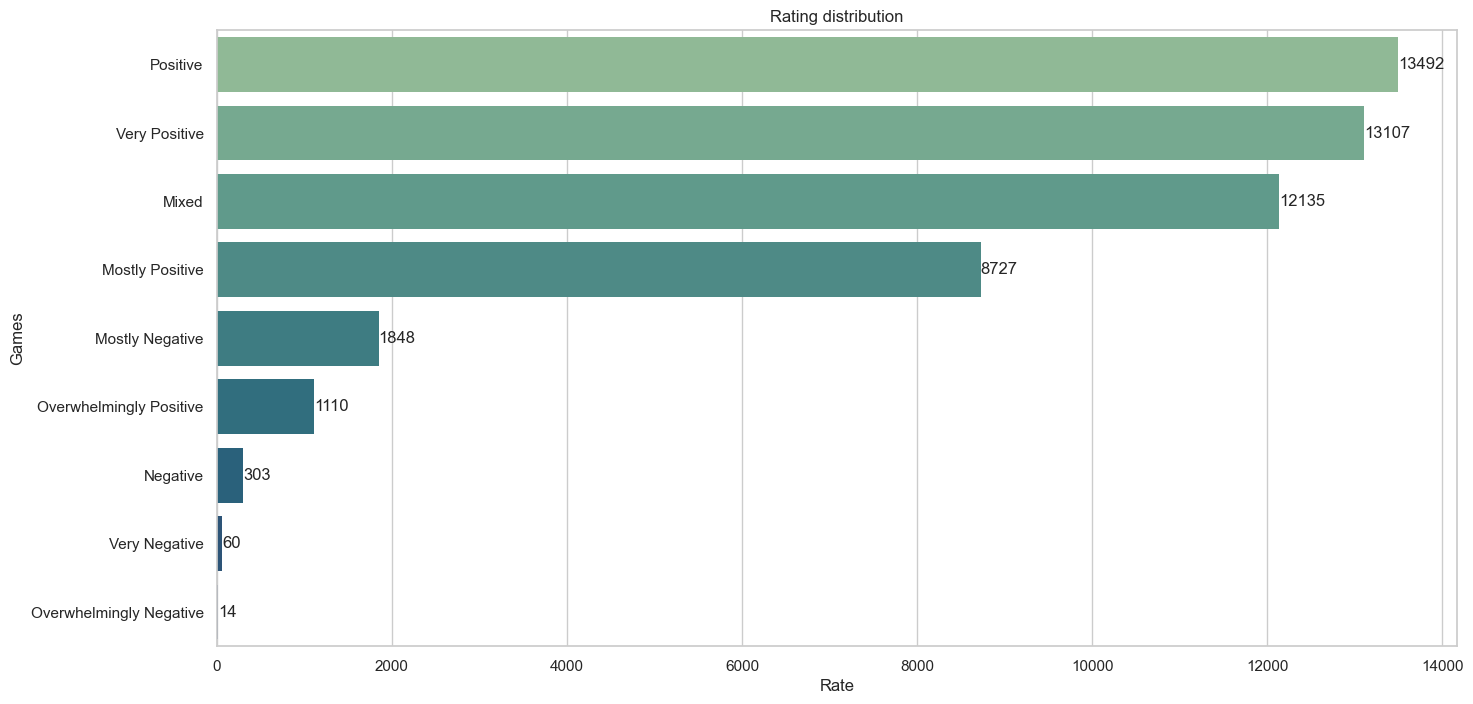

In [23]:
rate = games['rating'].value_counts()
labels = rate.index

palet = sns.color_palette("crest", len(rate))
plt.figure(figsize=(16, 8))

ax = sns.barplot(games, x=rate, y=labels, palette=palet)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

plt.ylabel('Games')
plt.xlabel('Rate')
plt.title('Rating distribution')

plt.show()

In [28]:
# overwhelming negative reviews

review = games[games['rating']=='Overwhelmingly Negative']
labels = review['title']
print(labels)


3191                             War of the Three Kingdoms
3386          Expansion - Europa Universalis IV: Leviathan
12843    Sid Meier's Civilization® VI: Vikings Scenario...
14190                                         Overwatch® 2
21930                          Tricolour Lovestory TrueEnd
22522                                         O2Jam Online
28370                                               Malice
29104                               Airport Simulator 2014
30635                                         SuperPower 3
33974                       Flatout 3: Chaos & Destruction
34240                 TEKKEN 7 - DLC13: Frame Data Display
36294                                       Spacebase DF-9
37536     Tom Clancy's Ghost Recon® Wildlands - Narco Road
41713                                         Kinetic Void
Name: title, dtype: object
